# Overview of Supervised Learning Models

In this notebook, we will explore several popular supervised learning models for both regression and classification tasks. Each model has unique strengths and weaknesses, making them suitable for different types of data and problems. Here’s a brief overview of each model we'll be using and when you might consider choosing it.

---

### **Linear Regression / Logistic Regression**
**Description**: Linear regression is a simple model that assumes a linear relationship between input features and the target variable. Logistic regression, a variant for classification, models the probability of a binary outcome.

**Use Case**: These models are often the first choice when the relationship between the features and target is approximately linear. They are easy to interpret, computationally efficient, and work well with small to medium-sized datasets.

**Limitations**: They may perform poorly on complex, non-linear relationships or when the data contains interactions between features.

---

### **Decision Trees**
**Description**: Decision trees split the data into branches based on feature values, resulting in a tree structure that can model non-linear relationships.

**Use Case**: Decision trees are useful when interpretability is important, as the decision paths can be visualized and understood. They are also effective on datasets with complex, non-linear patterns and can handle both categorical and numerical data.

**Limitations**: They are prone to overfitting, especially on small datasets, and are sensitive to slight variations in the data.

---

### **Random Forest**
**Description**: Random forests are an ensemble of decision trees where each tree is trained on a random subset of the data and features. The final prediction is made by averaging the predictions of individual trees (regression) or by majority vote (classification).

**Use Case**: Random forests are robust and handle a wide range of data types and complexities. They perform well on high-dimensional datasets and reduce the risk of overfitting compared to single decision trees.

**Limitations**: They can be computationally expensive on large datasets, and interpretability is lower compared to individual trees.

---

### **Gradient Boosted Trees**
**Description**: Gradient Boosting builds an ensemble of trees sequentially, where each tree attempts to correct the errors of the previous ones. It often yields highly accurate models.

**Use Case**: Gradient Boosted Trees are effective on structured/tabular data and perform well in many real-world applications, such as finance, healthcare, and customer analytics. They are particularly good when high predictive accuracy is required.

**Limitations**: These models can be sensitive to hyperparameters and are computationally more expensive than simpler models like decision trees or linear regression.

---

### **Neural Networks (Multi-Layer Perceptron)**
**Description**: Neural networks consist of layers of interconnected "neurons" that learn to capture complex patterns in the data. Multi-layer perceptrons (MLPs) are a type of neural network suitable for both regression and classification.

**Use Case**: Neural networks excel on large datasets and can capture complex, non-linear relationships. They are commonly used in applications like image and speech recognition but can also perform well on structured data.

**Limitations**: They are computationally intensive, require careful tuning, and can be prone to overfitting, especially on small datasets.

# Predicting University Admission Chance

We will now explore these supervised learning algorithms using `scikit-learn` to predict a student's admission chance to a university. We will use a dataset containing GRE scores, CGPA, and University Rating to predict the **Chance of Admit** (a continuous value for regression tasks and a categorized value for classification tasks).

---

## Import Libraries and Load Data

Let's start by importing the necessary libraries and loading the dataset. We will assume the dataset is already loaded into a pandas DataFrame called `df`.

In [90]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Load the data
df = pd.read_csv("adm_data.csv")

# Define feature and target variables for regression
X = df[['GRE Score', 'CGPA', 'University Rating']]
y = df['Chance of Admit ']

## Linear Regression

Linear regression is a simple yet powerful algorithm for predicting continuous outcomes. We will use it to predict the **Chance of Admit** based on the features.

In [91]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Mean Squared Error: {mse}")

Linear Regression Mean Squared Error: 0.005337028887688307


## Decision Tree Regression

A decision tree is a non-linear algorithm that splits data based on feature values. We will use it to predict the **Chance of Admit**.

In [92]:
# Initialize and train the decision tree regression model
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree Regression Mean Squared Error: {mse_tree}")

Decision Tree Regression Mean Squared Error: 0.013670625


## Random Forest Regression

Random forest is an ensemble learning technique that builds multiple decision trees and averages their results. This method can provide more robust predictions.

In [93]:
# Initialize and train the random forest regression model
forest_reg = RandomForestRegressor(random_state=0, n_estimators=100)
forest_reg.fit(X_train, y_train)

# Make predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluate the model
mse_forest = mean_squared_error(y_test, y_pred_forest)
print(f"Random Forest Regression Mean Squared Error: {mse_forest}")

Random Forest Regression Mean Squared Error: 0.007924486059409711


## Neural Network Regression

Neural networks can capture complex patterns in data, and here we use a multi-layer perceptron regressor for our task.

In [94]:
# Initialize and train the neural network regressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(10,10,), max_iter=1000, random_state=0)
mlp_reg.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_reg.predict(X_test)

# Evaluate the model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f"Neural Network Regression Mean Squared Error: {mse_mlp}")

Neural Network Regression Mean Squared Error: 0.014997529126741852


# Classification

For classification, we will categorize the **Chance of Admit** into three classes: **Low**, **Medium**, and **High**. Let's prepare the data accordingly and try different classification algorithms.

In [95]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# Create a categorical target variable with 'Low', 'Medium', and 'High' classes
df['Admit_Class'] = pd.cut(df['Chance of Admit '], bins=[0, 0.65, 0.8, 1], labels=['Low', 'Medium', 'High'])

# Define new target variable
y_class = df['Admit_Class']

# Split the data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=0)

# Scale the features
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

# Show the distribution of the classes
print(y_class.value_counts())

Admit_Class
Medium    161
Low       122
High      117
Name: count, dtype: int64


## Logistic Regression (Binary Classification)

We will first try logistic regression. Since logistic regression is inherently binary, we will start with predicting **Low** vs. **Not Low** categories.

Logistic Regression Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.93      0.93      0.93        60

    accuracy                           0.90        80
   macro avg       0.87      0.87      0.87        80
weighted avg       0.90      0.90      0.90        80



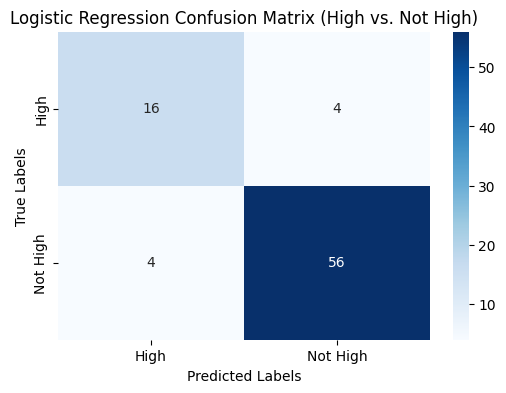

In [97]:
# Convert target to binary for logistic regression
y_class_binary = (y_class != 'High').astype(int)

# Split the data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_class_binary, test_size=0.2, random_state=0)

# Initialize and train logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train_bin, y_train_bin)

# Make predictions
y_pred_log = log_reg.predict(X_test_bin)

# Evaluate the model
accuracy = accuracy_score(y_test_bin, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test_bin, y_pred_log))

# Evaluate the model with confusion matrix
conf_matrix_log = confusion_matrix(y_test_bin, y_pred_log)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", xticklabels=["High", "Not High"], yticklabels=["High", "Not High"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Logistic Regression Confusion Matrix (High vs. Not High)")
plt.show()

## Decision Tree Classifier (Multi-Class Classification)

Now, we will use decision trees for the multi-class classification task to predict **Low**, **Medium**, or **High** chance of admission.

Decision Tree Classifier Accuracy: 0.675
              precision    recall  f1-score   support

        High       0.94      0.85      0.89        20
         Low       0.56      0.54      0.55        26
      Medium       0.62      0.68      0.65        34

    accuracy                           0.68        80
   macro avg       0.71      0.69      0.70        80
weighted avg       0.68      0.68      0.68        80



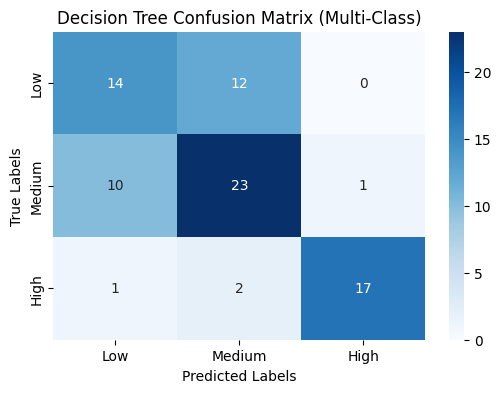

In [98]:
# Initialize and train the decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train_class, y_train_class)

# Make predictions
y_pred_tree_class = tree_clf.predict(X_test_class)

# Evaluate the model
accuracy_tree = accuracy_score(y_test_class, y_pred_tree_class)
print(f"Decision Tree Classifier Accuracy: {accuracy_tree}")

# Classification report
print(classification_report(y_test_class, y_pred_tree_class))

# Evaluate the model with confusion matrix
conf_matrix_tree = confusion_matrix(y_test_class, y_pred_tree_class, labels=['Low', 'Medium', 'High'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Decision Tree Confusion Matrix (Multi-Class)")
plt.show()

## Random Forest Classifier (Multi-Class Classification)

The random forest classifier builds multiple trees and takes the majority vote, which can improve accuracy.

Random Forest Classifier Accuracy: 0.7625
              precision    recall  f1-score   support

        High       0.89      0.85      0.87        20
         Low       0.73      0.73      0.73        26
      Medium       0.71      0.74      0.72        34

    accuracy                           0.76        80
   macro avg       0.78      0.77      0.78        80
weighted avg       0.76      0.76      0.76        80



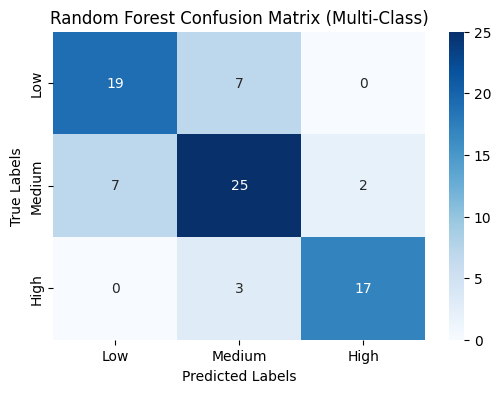

In [99]:
# Initialize and train the random forest classifier
forest_clf = RandomForestClassifier(random_state=0, n_estimators=100)
forest_clf.fit(X_train_class, y_train_class)

# Make predictions
y_pred_forest_class = forest_clf.predict(X_test_class)

# Evaluate the model
accuracy_forest = accuracy_score(y_test_class, y_pred_forest_class)
print(f"Random Forest Classifier Accuracy: {accuracy_forest}")

# Classification report
print(classification_report(y_test_class, y_pred_forest_class))

# Evaluate the model with confusion matrix
conf_matrix_forest = confusion_matrix(y_test_class, y_pred_forest_class, labels=['Low', 'Medium', 'High'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_forest, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Random Forest Confusion Matrix (Multi-Class)")
plt.show()

## Gradient Boosted Trees Classifier (Multi-Class Classification)

Gradient Boosted Trees is an ensemble method that builds sequential decision trees where each tree tries to correct the errors of the previous ones. Let's use it to classify **Low**, **Medium**, or **High** chance of admission.

Gradient Boosted Trees Classifier Accuracy: 0.7375
              precision    recall  f1-score   support

        High       0.90      0.90      0.90        20
         Low       0.67      0.69      0.68        26
      Medium       0.70      0.68      0.69        34

    accuracy                           0.74        80
   macro avg       0.75      0.76      0.76        80
weighted avg       0.74      0.74      0.74        80



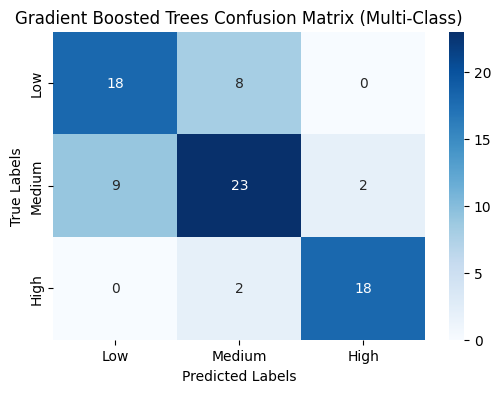

In [100]:
# Initialize and train the gradient boosting classifier
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train_class, y_train_class)

# Make predictions
y_pred_gb_class = gb_clf.predict(X_test_class)

# Evaluate the model
accuracy_gb = accuracy_score(y_test_class, y_pred_gb_class)
print(f"Gradient Boosted Trees Classifier Accuracy: {accuracy_gb}")

# Classification report
print(classification_report(y_test_class, y_pred_gb_class))

# Evaluate the model with confusion matrix
conf_matrix_gb = confusion_matrix(y_test_class, y_pred_gb_class, labels=['Low', 'Medium', 'High'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Gradient Boosted Trees Confusion Matrix (Multi-Class)")
plt.show()


## Neural Network Classifier (Multi-Class Classification)

Lastly, we use a neural network classifier (MLP) for the multi-class classification.

Neural Network Classifier Accuracy: 0.7125
              precision    recall  f1-score   support

        High       0.81      0.85      0.83        20
         Low       0.70      0.62      0.65        26
      Medium       0.67      0.71      0.69        34

    accuracy                           0.71        80
   macro avg       0.72      0.72      0.72        80
weighted avg       0.71      0.71      0.71        80



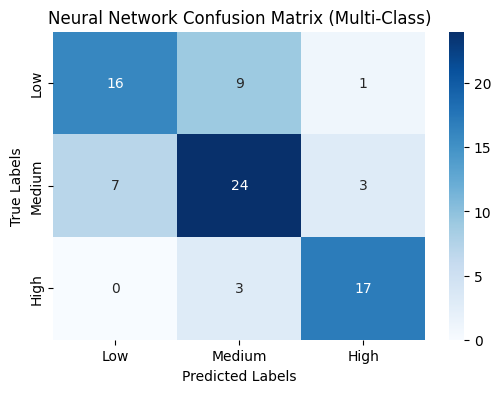

In [101]:
# Initialize and train the neural network classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,10,), max_iter=1000, random_state=0)
mlp_clf.fit(X_train_class, y_train_class)

# Make predictions
y_pred_mlp_class = mlp_clf.predict(X_test_class)

# Evaluate the model
accuracy_mlp = accuracy_score(y_test_class, y_pred_mlp_class)
print(f"Neural Network Classifier Accuracy: {accuracy_mlp}")

# Classification report
print(classification_report(y_test_class, y_pred_mlp_class))

# Evaluate the model with confusion matrix
conf_matrix_mlp = confusion_matrix(y_test_class, y_pred_mlp_class, labels=['Low', 'Medium', 'High'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Neural Network Confusion Matrix (Multi-Class)")
plt.show()